<a href="https://colab.research.google.com/github/Purvi67-priya/Assignment_RnD/blob/main/Assignment_Flam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize






In [4]:
data = pd.read_csv("xy_data.csv")
x_obs, y_obs = data.iloc[:, 0].values, data.iloc[:, 1].values
t = np.linspace(6, 60, len(x_obs))

In [5]:
def model(params, t):
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)
    exp_term = np.exp(M * np.abs(t))
    x_pred = t*np.cos(theta) - exp_term*np.sin(0.3*t)*np.sin(theta) + X
    y_pred = 42 + t*np.sin(theta) + exp_term*np.sin(0.3*t)*np.cos(theta)
    return x_pred, y_pred

In [6]:
def objective(params):
    x_pred, y_pred = model(params, t)
    return np.mean(np.sqrt((x_obs - x_pred)**2 + (y_obs - y_pred)**2))

In [14]:


bounds = [(0, 50), (-0.05, 0.05), (0, 100)]
initial_guess = [25, 0, 50]


res = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')


theta_opt, M_opt, X_opt = res.x


print("Optimized Parameters:")
print(f"  Theta = {theta_opt:.6f}°")
print(f"  M     = {M_opt:.6f}")
print(f"  X     = {X_opt:.6f}")



Optimized Parameters:
  Theta = 30.044095°
  M     = -0.005280
  X     = 55.347343


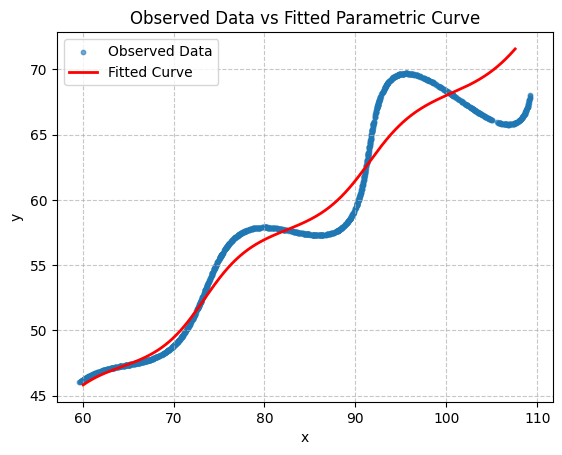

In [13]:

x_fit, y_fit = model(res.x, t)
plt.scatter(x_obs, y_obs, s=10, alpha=0.6, label='Observed Data')
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Fitted Curve')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data vs Fitted Parametric Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Display plot
plt.show()
